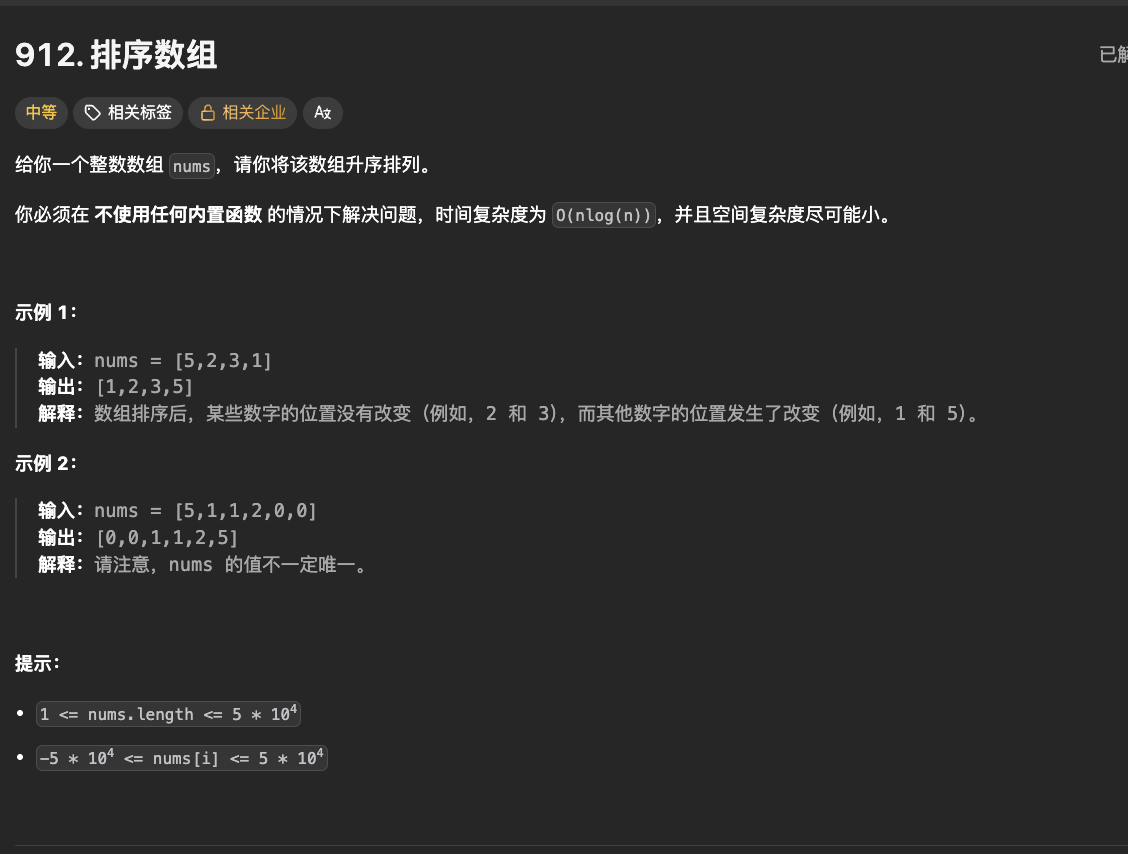

In [3]:
#快慢指针实现快速排序
import random

class Solution(object):
    def sortArray(self, nums):
        """
        使用快慢指针 (Lomuto Partition) 实现快速排序
        """
        self.quick_sort(nums, 0, len(nums) - 1)
        return nums

    def quick_sort(self, nums, left, right):
        if left >= right:
            return
        
        # 获取分区点 (pivot_index)
        # 此时 nums[pivot_index] 已经排在了它最终应该在的位置
        pivot_index = self.partition(nums, left, right)
        
        # 递归处理左右两边
        self.quick_sort(nums, left, pivot_index - 1)
        self.quick_sort(nums, pivot_index + 1, right)

    def partition(self, nums, left, right):
        """
        快慢指针分区逻辑
        """
        # --- 1. 随机选一个基准点并交换到末尾 (避免有序数组导致 O(N^2)) ---
        random_idx = random.randint(left, right)
        nums[random_idx], nums[right] = nums[right], nums[random_idx]
        
        pivot = nums[right]  # 选取最右边的元素作为基准
        
        # --- 2. 快慢指针移动逻辑 ---
        # slow 指针：指向"小于 pivot 区域"的下一个位置（即等待放入小元素的位置）
        # fast 指针：负责遍历查找
        slow = left
        
        # fast 从 left 遍历到 right - 1
        for fast in range(left, right):
            if nums[fast] < pivot:
                # 发现比 pivot 小的元素，交换到 slow 的位置
                nums[slow], nums[fast] = nums[fast], nums[slow]
                slow += 1
        
        # --- 3. 将基准点 (pivot) 放到正确的位置 (slow 的位置) ---
        nums[slow], nums[right] = nums[right], nums[slow]
        
        # 返回 pivot 最终所在的下标
        return slow

# --- 测试代码部分 ---
if __name__ == '__main__':
    solution = Solution()
    
    test_cases = [
        {
            "input": [5, 2, 3, 1],
            "expected": [1, 2, 3, 5],
            "description": "常规乱序"
        },
        {
            "input": [5, 1, 1, 2, 0, 0],
            "expected": [0, 0, 1, 1, 2, 5],
            "description": "包含重复元素"
        },
        {
            "input": [1, 2, 3, 4, 5],
            "expected": [1, 2, 3, 4, 5],
            "description": "已有序数组"
        },
        {
            "input": [5, 4, 3, 2, 1],
            "expected": [1, 2, 3, 4, 5],
            "description": "逆序数组"
        }
    ]
    
    print("--- 开始测试 LeetCode 912 (快慢指针版) ---")
    
    for idx, case in enumerate(test_cases):
        input_data = list(case["input"])
        result = solution.sortArray(input_data)
        expected = case["expected"]
        
        is_pass = result == expected
        status = "OK" if is_pass else "Fail"
        
        print("\n测试用例 {}: {}".format(idx + 1, case['description']))
        print("输入: {}".format(case['input']))
        print("输出: {}".format(result))
        print("状态: {}".format(status))

    print("\n--- 测试结束 ---")

--- 开始测试 LeetCode 912 (快慢指针版) ---

测试用例 1: 常规乱序
输入: [5, 2, 3, 1]
输出: [1, 2, 3, 5]
状态: OK

测试用例 2: 包含重复元素
输入: [5, 1, 1, 2, 0, 0]
输出: [0, 0, 1, 1, 2, 5]
状态: OK

测试用例 3: 已有序数组
输入: [1, 2, 3, 4, 5]
输出: [1, 2, 3, 4, 5]
状态: OK

测试用例 4: 逆序数组
输入: [5, 4, 3, 2, 1]
输出: [1, 2, 3, 4, 5]
状态: OK

--- 测试结束 ---


In [4]:
#“三路切分” (Three-Way Partition)
import random

class Solution(object):
    def sortArray(self, nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        self.quick_sort(nums, 0, len(nums) - 1)
        return nums

    def quick_sort(self, nums, left, right):
        if left >= right:
            return

        # --- 1. 随机选择基准点 (避免有序数组退化) ---
        random_idx = random.randint(left, right)
        nums[left], nums[random_idx] = nums[random_idx], nums[left]
        
        pivot = nums[left]
        
        # --- 2. 三路切分 (处理重复元素) ---
        # lt: 小于 pivot 部分的右边界
        # gt: 大于 pivot 部分的左边界
        # i:  当前遍历指针
        lt = left
        gt = right
        i = left + 1
        
        while i <= gt:
            if nums[i] < pivot:
                nums[i], nums[lt] = nums[lt], nums[i]
                lt += 1
                i += 1
            elif nums[i] > pivot:
                nums[i], nums[gt] = nums[gt], nums[i]
                gt -= 1
                # 注意：这里 i 不自增，因为换回来的新元素还需要判断
            else:
                i += 1
        
        # 递归处理左右两边 (中间相等的部分不用再排了)
        self.quick_sort(nums, left, lt - 1)
        self.quick_sort(nums, gt + 1, right)

# --- 测试代码部分 ---
if __name__ == '__main__':
    solution = Solution()
    
    test_cases = [
        {
            "input": [5, 2, 3, 1],
            "expected": [1, 2, 3, 5],
            "description": "常规乱序"
        },
        {
            "input": [5, 1, 1, 2, 0, 0],
            "expected": [0, 0, 1, 1, 2, 5],
            "description": "包含重复元素"
        },
        {
            "input": [2, 2, 2, 2, 2],
            "expected": [2, 2, 2, 2, 2],
            "description": "全部重复元素"
        },
        {
            "input": [-4, 0, 7, 4, 9, -5, -1, 0, -7, -1],
            "expected": [-7, -5, -4, -1, -1, 0, 0, 4, 7, 9],
            "description": "包含负数"
        }
    ]
    
    print("--- 开始测试 LeetCode 912 (无类型提示版) ---")
    
    for idx, case in enumerate(test_cases):
        # 使用 list(case["input"]) 创建副本，防止修改原数据
        input_data = list(case["input"])
        result = solution.sortArray(input_data)
        expected = case["expected"]
        
        is_pass = result == expected
        status = "OK" if is_pass else "Fail"
        
        print("\n测试用例 {}: {}".format(idx + 1, case['description']))
        print("输入: {}".format(case['input']))
        print("输出: {}".format(result))
        print("状态: {}".format(status))

    print("\n--- 测试结束 ---")

--- 开始测试 LeetCode 912 (无类型提示版) ---

测试用例 1: 常规乱序
输入: [5, 2, 3, 1]
输出: [1, 2, 3, 5]
状态: OK

测试用例 2: 包含重复元素
输入: [5, 1, 1, 2, 0, 0]
输出: [0, 0, 1, 1, 2, 5]
状态: OK

测试用例 3: 全部重复元素
输入: [2, 2, 2, 2, 2]
输出: [2, 2, 2, 2, 2]
状态: OK

测试用例 4: 包含负数
输入: [-4, 0, 7, 4, 9, -5, -1, 0, -7, -1]
输出: [-7, -5, -4, -1, -1, 0, 0, 4, 7, 9]
状态: OK

--- 测试结束 ---
